<img src="https://entrackr.com/storage/2023/02/LoanTap.jpg" width="900" height="350">

## About LoanTap💸

LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer-friendly terms to salaried professionals and businessmen.

### Business Problem 💡

The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

LoanTap deploys formal credit to salaried individuals and businesses through 4 main financial instruments:

- Personal Loan
- EMI Free Loan
- Personal Overdraft
- Advance Salary Loan

This case study will focus on the underwriting process behind Personal Loan only.

### Dataset 📊

| Column Name            | Description                                                                                                                   |
|------------------------|-------------------------------------------------------------------------------------------------------------------------------|
| `loan_amnt`            | The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value. |
| `term`                 | The number of payments on the loan. Values are in months and can be either 36 or 60.                                           |
| `int_rate`             | Interest Rate on the loan.                                                                                                     |
| `installment`          | The monthly payment owed by the borrower if the loan originates.                                                              |
| `grade`                | LoanTap assigned loan grade.                                                                                                   |
| `sub_grade`            | LoanTap assigned loan subgrade.                                                                                               |
| `emp_title`            | The job title supplied by the Borrower when applying for the loan.                                                            |
| `emp_length`           | Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. |
| `home_ownership`       | The home ownership status provided by the borrower during registration or obtained from the credit report.                    |
| `annual_inc`           | The self-reported annual income provided by the borrower during registration.                                                 |
| `verification_status`  | Indicates if income was verified by LoanTap, not verified, or if the income source was verified.                              |
| `issue_d`              | The month which the loan was funded.                                                                                           |
| `loan_status`          | Current status of the loan - Target Variable.                                                                                  |
| `purpose`              | A category provided by the borrower for the loan request.                                                                     |
| `title`                | The loan title provided by the borrower.                                                                                       |
| `dti`                  | A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income. |
| `earliest_cr_line`     | The month the borrower's earliest reported credit line was opened.                                                            |
| `open_acc`             | The number of open credit lines in the borrower's credit file.                                                                |
| `pub_rec`              | Number of derogatory public records.                                                                                           |
| `revol_bal`            | Total credit revolving balance.                                                                                               |
| `revol_util`           | Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.    |
| `total_acc`            | The total number of credit lines currently in the borrower's credit file.                                                     |
| `initial_list_status`  | The initial listing status of the loan. Possible values are – W, F.                                                           |
| `application_type`     | Indicates whether the loan is an individual application or a joint application with two co-borrowers.                         |
| `mort_acc`             | Number of mortgage accounts.                                                                                                  |
| `pub_rec_bankruptcies` | Number of public record bankruptcies.                                                                                         |
| `Address`              | Address of the individual.                                                                                                    |

- - - -

#### Importing Required Libraries 🤝

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

palette = ['#963f8d', '#624496']
sns.set(style='ticks', palette=palette)

#### Read Dataset 🔍

In [5]:
df = pd.read_csv('../data/LoanTapData.csv')
df.sample(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
263539,20500.0,60 months,20.99,554.48,E,E4,Behavior Specialist,10+ years,MORTGAGE,57000.0,Source Verified,May-2014,Charged Off,debt_consolidation,Debt consolidation,9.41,Sep-1990,9.0,5.0,4766.0,54.2,15.0,w,INDIVIDUAL,1.0,0.0,"01246 Carrie Passage\r\nNew Kyle, ND 11650"
25692,10000.0,36 months,10.99,327.34,B,B4,Rca,10+ years,MORTGAGE,40000.0,Source Verified,Jul-2015,Fully Paid,debt_consolidation,Debt consolidation,15.30,May-2001,13.0,2.0,10602.0,35.6,27.0,w,INDIVIDUAL,5.0,2.0,"00296 Kirk Bypass Suite 650\r\nPerezburgh, LA ..."
18277,6500.0,36 months,10.15,210.20,B,B2,Payroll Admin,7 years,RENT,46000.0,Source Verified,Jul-2014,Fully Paid,credit_card,Credit card refinancing,32.92,Oct-1995,13.0,0.0,14818.0,42.5,30.0,f,INDIVIDUAL,0.0,0.0,"81136 Beth Hollow\r\nRhondaland, RI 00813"
327083,5350.0,36 months,12.12,178.01,B,B3,peacock interiors and gallery inc,4 years,RENT,40000.0,Not Verified,Dec-2012,Fully Paid,credit_card,debit consolidation,13.50,Dec-2004,7.0,0.0,16607.0,40.3,15.0,f,INDIVIDUAL,0.0,0.0,"2423 Hines Spring Apt. 664\r\nNew Pamela, IL 0..."
306382,1500.0,36 months,7.88,46.93,A,A5,Lawrence public schools,9 years,RENT,35000.0,Not Verified,Apr-2010,Fully Paid,vacation,kitten,11.69,Dec-1988,9.0,0.0,3162.0,22.4,27.0,f,INDIVIDUAL,NaN,0.0,"302 Schmidt Avenue\r\nJeffreyville, NM 00813"


In [6]:
print("Shape of the data: ", df.shape)
print("The Given Dataset has {} rows and {} columns".format(df.shape[0], df.shape[1]))
print("Columns: ", df.columns.to_list())

Shape of the data:  (396030, 27)
The Given Dataset has 396030 rows and 27 columns
Columns:  ['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address']


### Shape 🕵🏽‍♂️

* The dataset comprises 396030 rows and 27 columns, representing a volume of data. 
* Each row corresponds to each loan distribution by the company.

### Data Structure 📰

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [8]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [9]:
df_missing = df.isnull().sum()
df_missing = df_missing[df_missing > 0]
df_missing = df_missing.sort_values(ascending=False)
df_missing = df_missing.to_frame()
df_missing.columns = ['count']
df_missing

,count
mort_acc,37795
emp_title,22927
emp_length,18301
title,1756
pub_rec_bankruptcies,535
revol_util,276


In [10]:
numeric_features = ['mort_acc', 'pub_rec_bankruptcies', 'revol_util']
df[numeric_features] = df[numeric_features].fillna(df[numeric_features].median())

categorical_features = ['emp_title', 'emp_length', 'title']
df[categorical_features] = df[categorical_features].fillna(df[categorical_features].mode().iloc[0])

df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,396030.0,53.792451,24.443685,0.00,35.90,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [13]:
df.describe(include='object').T

,count,unique,top,freq
term,396030,2,36 months,302005
grade,396030,7,B,116018
sub_grade,396030,35,B3,26655
emp_title,396030,173105,Teacher,27316
emp_length,396030,11,10+ years,144342
home_ownership,396030,6,MORTGAGE,198348
verification_status,396030,3,Verified,139563
issue_d,396030,115,Oct-2014,14846
loan_status,396030,2,Fully Paid,318357
purpose,396030,14,debt_consolidation,234507


### 🕵🏽‍♂️ Dataset Information:

* **Data Consistency**: Few columns has missing values in the dataset.
* **Data Types**: Columns are classified into object and float types.
* **Duplicate**: There is no duplicate rows identified

### Preprocessing ⚙️

In [14]:
df['pincode'] = df['address'].apply(lambda x: x.split()[-1])
df['pincode'] = df['pincode'].astype('int')

In [15]:
df['state'] = df['address'].apply(lambda x: x.split()[-2])
df['state'] = df['state'].astype('str')

In [16]:
# Create flags
df['pub_rec_flag'] = df['pub_rec'].apply(lambda x: 1 if x > 1.0 else 0)
df['mort_acc_flag'] = df['mort_acc'].apply(lambda x: 1 if x > 1.0 else 0)
df['pub_rec_bankruptcies_flag'] = df['pub_rec_bankruptcies'].apply(lambda x: 1 if x > 1.0 else 0)


In [17]:
df_ = df[df['loan_status']=='Fully Paid']
df_['emp_title'] = df_['emp_title'].str.lower()
(df_['emp_title'].value_counts(normalize=True) * 100).to_frame().head(10)

,proportion
emp_title,
teacher,6.702852
manager,1.356967
registered nurse,0.658066
supervisor,0.618174
sales,0.555980
rn,0.517344
driver,0.506350
owner,0.465201
project manager,0.463002


**❓ Name the top 2 afforded job titles.**
- Teacher
- Manager

In [18]:
# Columns Might not be useful
useless_columns = ['emp_title', 'issue_d', 'title', 'earliest_cr_line', 'address', 'pub_rec', 'mort_acc', 'pub_rec_bankruptcies']
df = df.drop(useless_columns, axis=1)

In [19]:
# Object columns to Category
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')

### 🕵🏽‍♂️ Insight
High cardinality columns are removed
* emp_title (173105)
* title (48816)
* address (393700)

Other columns like
* issue_d
* earliest_cr_line

and likely not useful for predicting loan status. 

### Exploratory Data Analysis (EDA) 💹

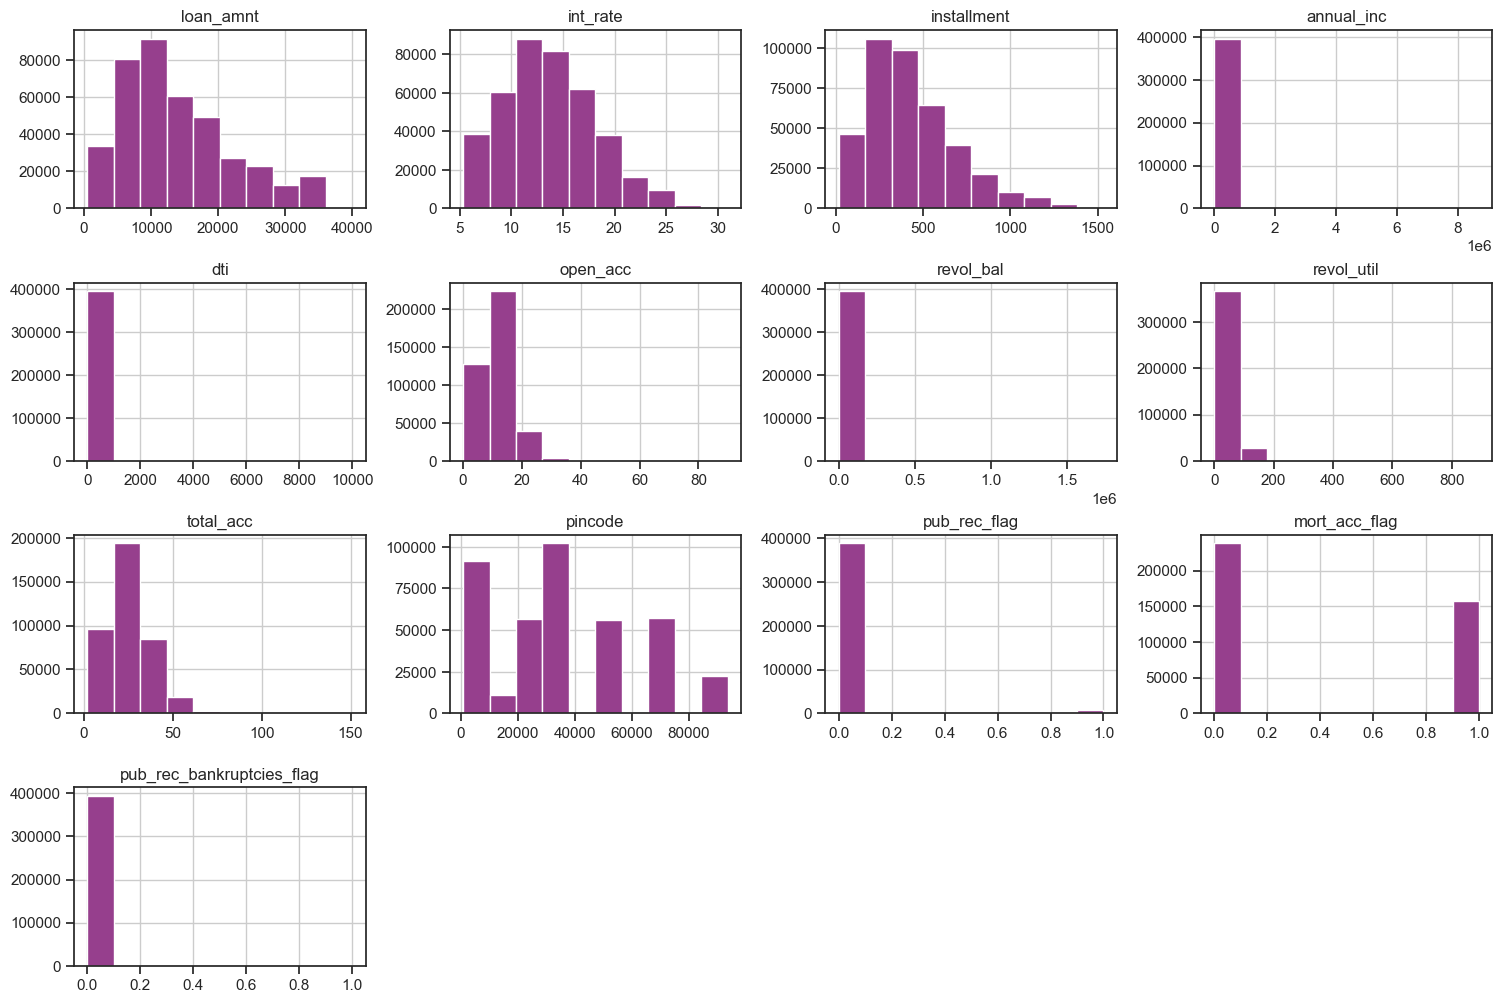

In [20]:
df.hist(figsize=(15, 10), color=palette[0])
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout(pad=0.5)
plt.text(0.5, 0.5, 'Histograms', horizontalalignment='center', verticalalignment='center', fontsize=15, color='red', alpha=0.5)
plt.show()

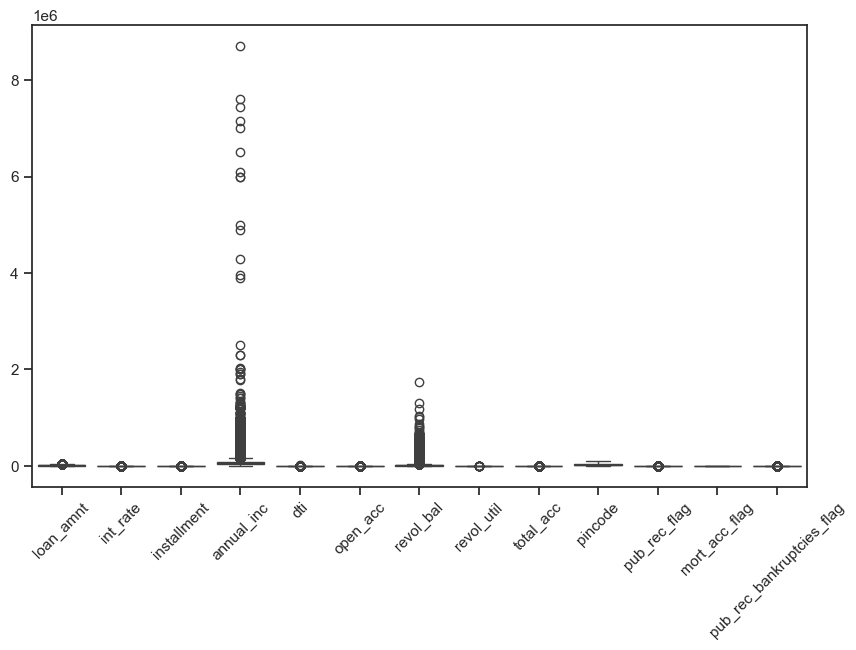

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

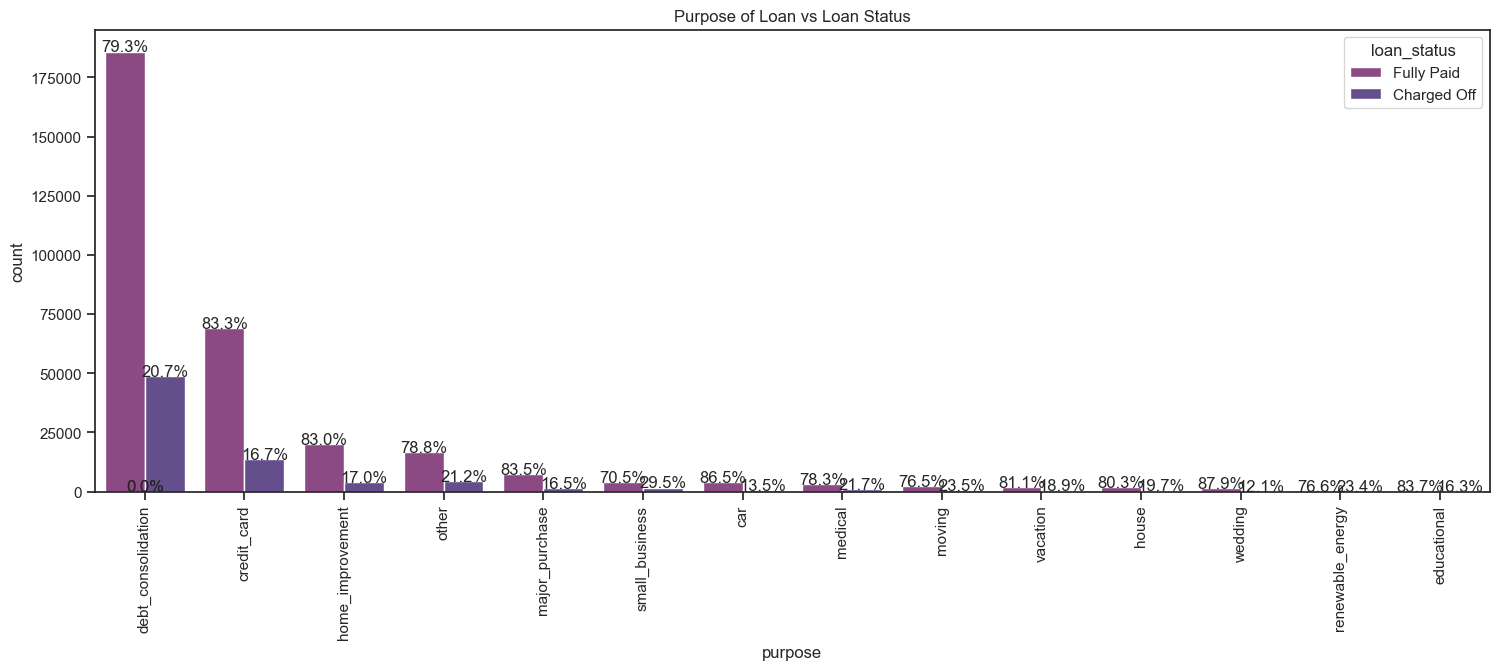

In [22]:
plt.figure(figsize=(18, 6))
loan_status_counts = df['loan_status'].value_counts()
sns.countplot(data=df, x='purpose', hue='loan_status', 
              order=df['purpose'].value_counts().index,
              hue_order=loan_status_counts.index)
plt.xticks(rotation=90)
plt.title('Purpose of Loan vs Loan Status')

# Calculate percentages
total_counts = df['purpose'].value_counts()
for p in plt.gca().patches:
    height = p.get_height()
    total = total_counts[round(p.get_x())]
    percentage = height / total * 100
    plt.gca().text(p.get_x() + p.get_width() / 2 , height + 20, f'{percentage:.1f}%', ha='center')

plt.show()

In [23]:
loan_status_by_purpose = df[['loan_status', 'purpose']].groupby(['purpose', 'loan_status']).size().unstack().reset_index()
# loan_status_by_purpose.drop(columns=['loan_status'], inplace=True)
loan_status_by_purpose['Total'] = loan_status_by_purpose[['Charged Off','Fully Paid']].sum(axis=1)
loan_status_by_purpose['Charged Off Percentage'] = round(loan_status_by_purpose['Charged Off'] / loan_status_by_purpose['Total'] * 100, 2)
loan_status_by_purpose['Fully Paid Percentage'] = round(loan_status_by_purpose['Fully Paid'] / loan_status_by_purpose['Total'] * 100, 2)
loan_status_by_purpose.sort_values(by='Charged Off Percentage', ascending=False, inplace=True)
loan_status_by_purpose

loan_status,purpose,Charged Off,Fully Paid,Total,Charged Off Percentage,Fully Paid Percentage
11,small_business,1679,4022,5701,29.45,70.55
8,moving,670,2184,2854,23.48,76.52
10,renewable_energy,77,252,329,23.40,76.60
7,medical,911,3285,4196,21.71,78.29
9,other,4495,16690,21185,21.22,78.78
2,debt_consolidation,48640,185867,234507,20.74,79.26
5,house,434,1767,2201,19.72,80.28
12,vacation,464,1988,2452,18.92,81.08
4,home_improvement,4087,19943,24030,17.01,82.99
1,credit_card,13874,69145,83019,16.71,83.29


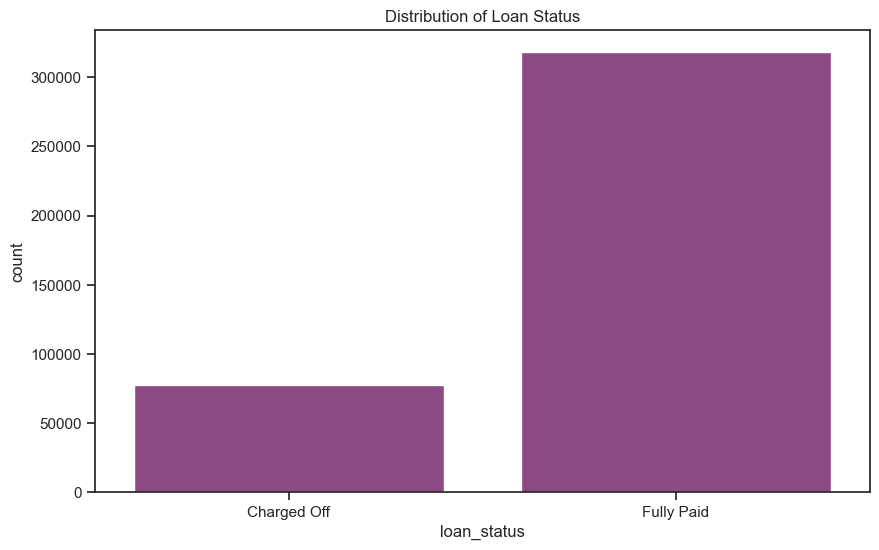

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='loan_status', data=df)
plt.title('Distribution of Loan Status')
plt.show()

In [25]:
df['loan_status'].value_counts(normalize=True) * 100

loan_status
Fully Paid     80.387092
Charged Off    19.612908
Name: proportion, dtype: float64

**❓ What percentage of customers have fully paid their Loan Amount?**
- 80.38% of loans are fully paid

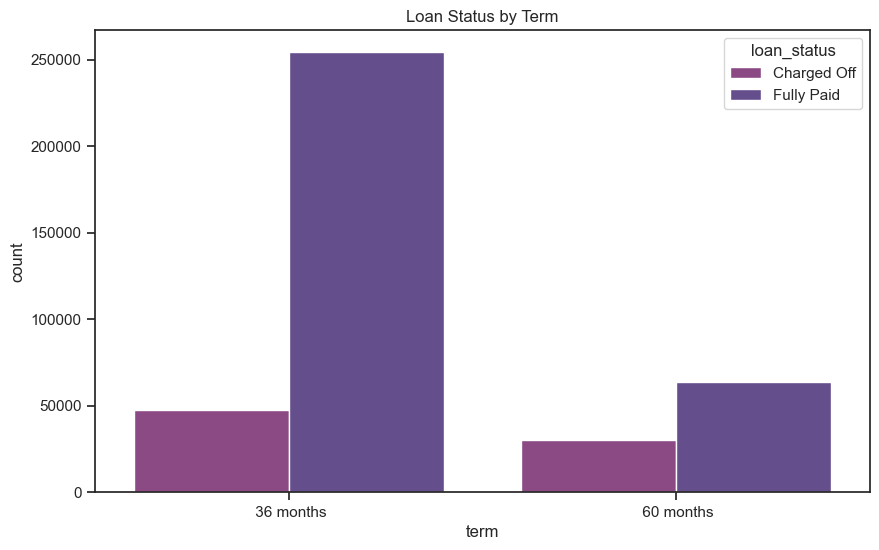

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(x='term', hue='loan_status', data=df)
plt.title('Loan Status by Term')
plt.show()

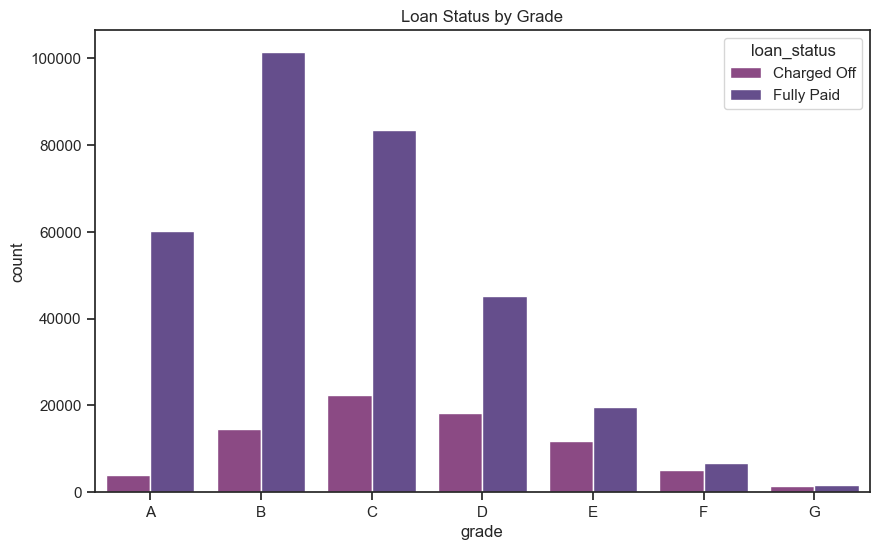

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(x='grade', hue='loan_status', data=df)
plt.title('Loan Status by Grade')
plt.show()

In [28]:
df_ = df[df['grade']=='A']
df_['loan_status'].value_counts(normalize=True) * 100

loan_status
Fully Paid     93.712122
Charged Off     6.287878
Name: proportion, dtype: float64

**❓ People with grades ‘A’ are more likely to fully pay their loan. (T/F)**
- True, ~94% people with 'A' Grade paid their loan

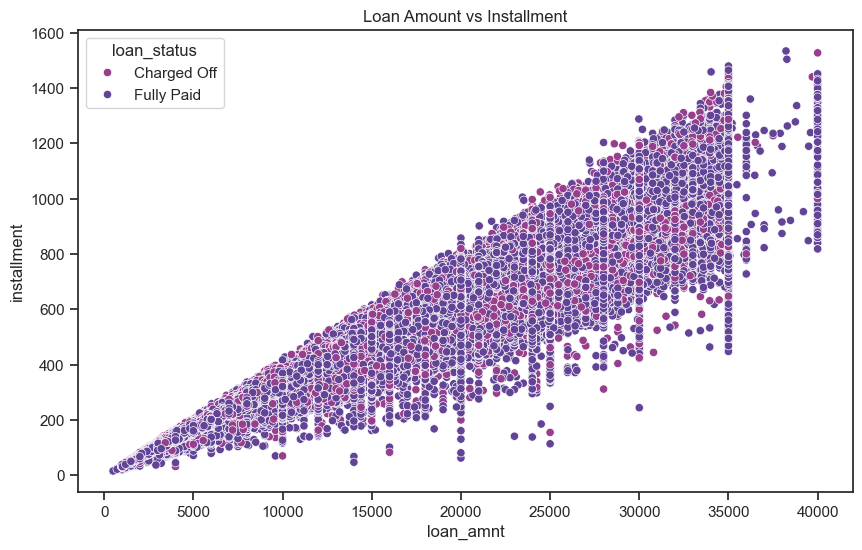

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loan_amnt', y='installment', data=df, hue='loan_status')
plt.title('Loan Amount vs Installment')
plt.show()

In [30]:
correlation = df['loan_amnt'].corr(df['installment'])
print(f"correlation between Loan Amount and Installment features: ", np.round(correlation, 2))

correlation between Loan Amount and Installment features:  0.95


**❓Correlation between Loan Amount and Installment features:  **
- 0.95

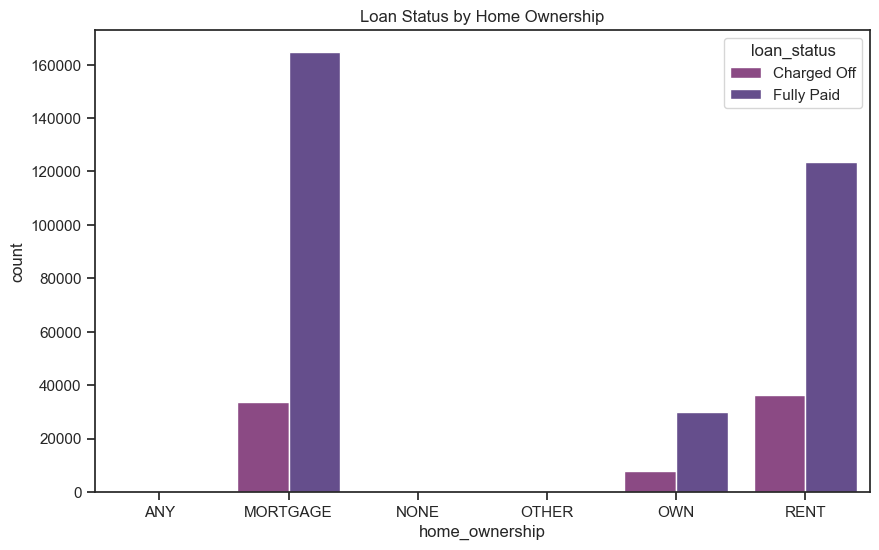

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(x='home_ownership', hue='loan_status', data=df)
plt.title('Loan Status by Home Ownership')
plt.show()

**❓The majority of people have home ownership as**
- Mortage

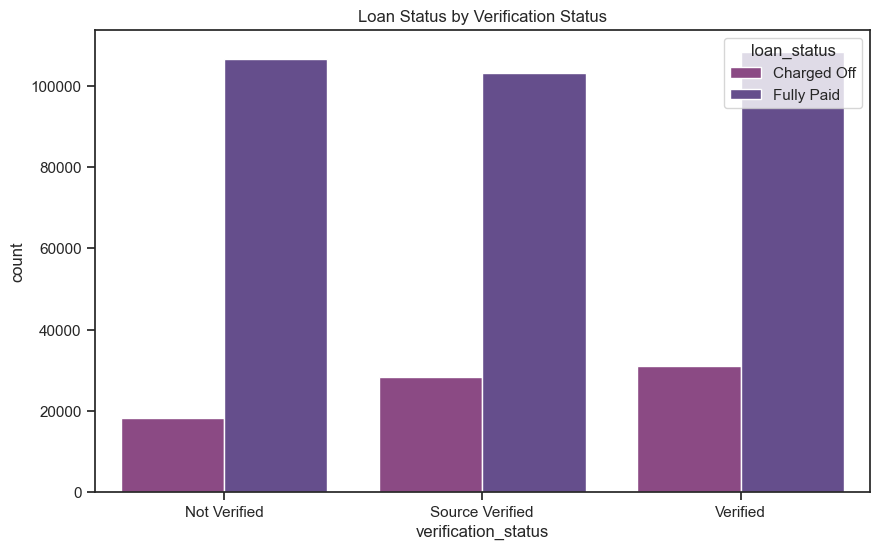

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(x='verification_status', hue='loan_status', data=df)
plt.title('Loan Status by Verification Status')
plt.show()

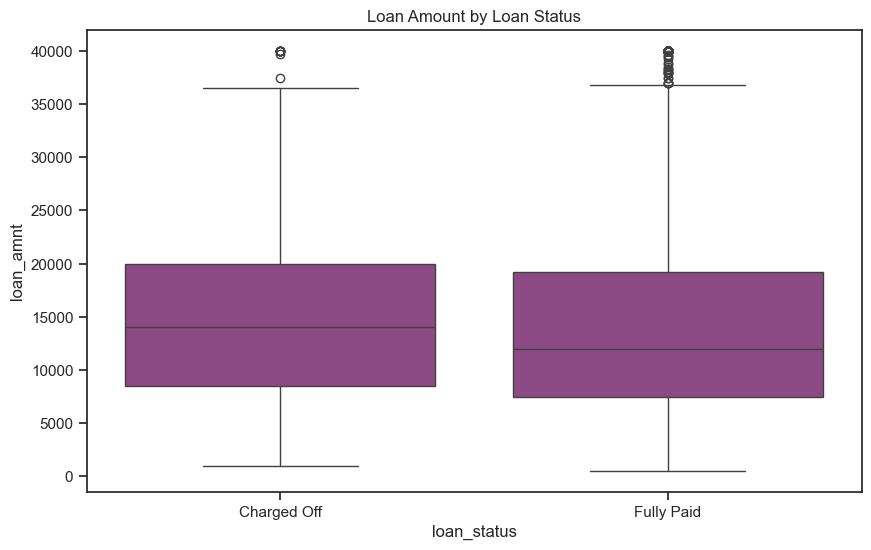

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=df)
plt.title('Loan Amount by Loan Status')
plt.show()

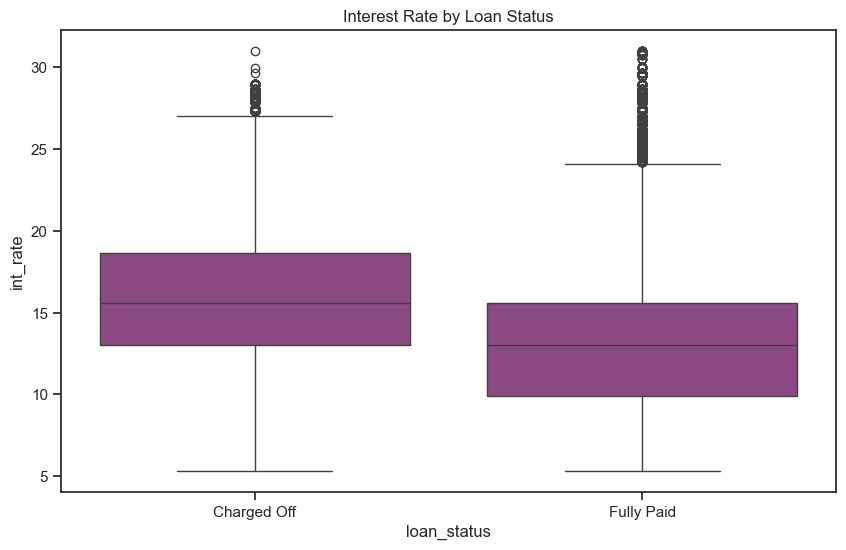

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='int_rate', data=df)
plt.title('Interest Rate by Loan Status')
plt.show()

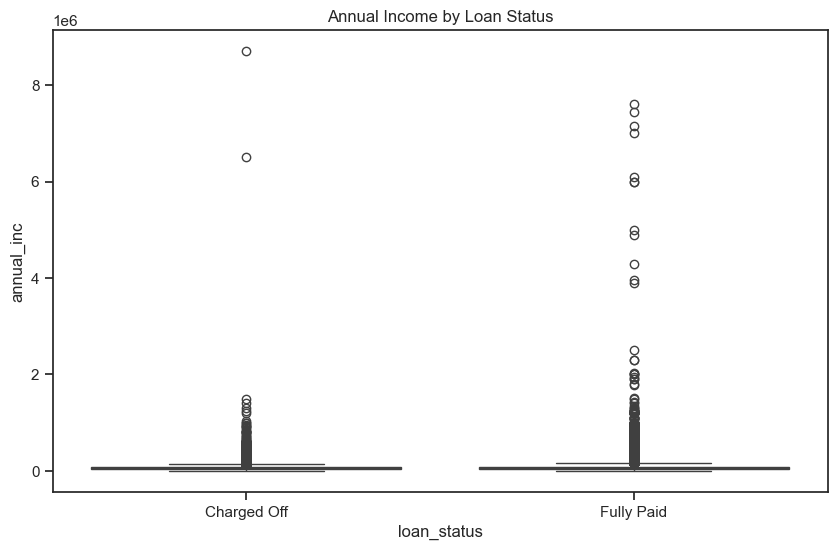

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='annual_inc', data=df)
plt.title('Annual Income by Loan Status')
plt.show()

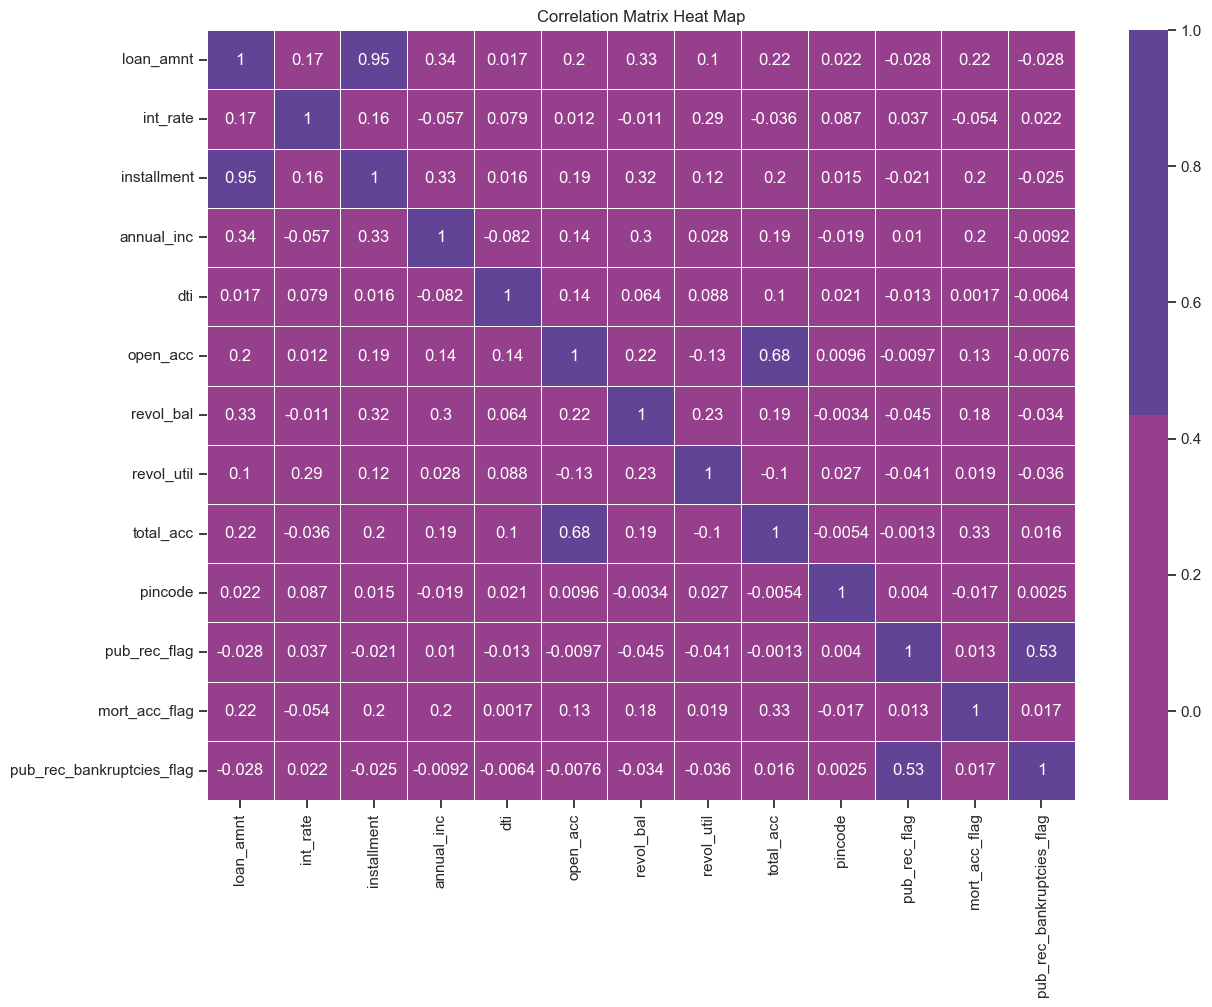

In [36]:
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap=palette, linewidths=0.5)
plt.title('Correlation Matrix Heat Map')
plt.show()

In [37]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

### 🕵🏽‍♂️ Insights:
* Annual income columns has higher outliers
* More loans are availed for "Debt Consolidation"
* ~80% of loans opted for "Debt Consolidation" are Fully paid, ~20% are Charged off
* Second highest reason for loan for "Credit_card"
* 0.95 correlation between Loan Amount and Installment features, Hence one can be removed during modelling

## Data preparation for Modelling 🤼 

In [38]:
df = df.drop(columns=['installment'])

In [39]:
X = df.drop(columns=['loan_status'])
# y = df['loan_status']
y = df['loan_status'].apply(lambda x: 1 if x == 'Fully Paid' else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# preprocessing steps
numeric_features = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc','pub_rec_flag', 'mort_acc_flag', 'pub_rec_bankruptcies_flag', 'pincode']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = ['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type', 'state']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(sparse_output=False, drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_train = preprocessor.fit_transform(X_train)

In [41]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [42]:
X_test = preprocessor.transform(X_test)
y_pred = model.predict(X_test)

In [43]:
# Model Evaluation
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.8361235259955054
              precision    recall  f1-score   support

           0       0.69      0.31      0.43     15577
           1       0.85      0.97      0.90     63629

    accuracy                           0.84     79206
   macro avg       0.77      0.64      0.66     79206
weighted avg       0.82      0.84      0.81     79206



In [44]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print("ROC AUC Score: ", roc_auc_score(y_test, y_pred))

Precision:  0.8507208442394781
Recall:  0.9654088544531582
F1 Score:  0.9044435937453988
ROC AUC Score:  0.6367135432309445


**❓ Thinking from a bank's perspective, which metric should our primary focus be on:**
- ROC AUC
- Precision
- Recall
- F1 Score

**Bank's Perspective**
From a bank's perspective, the primary focus should typically be on minimizing financial risk while maximizing opportunities for profit. This involves a delicate balance:

- *Minimizing False Negatives (Recall)*: 

   - Missing a defaulter can lead to financial losses, so high recall is important.

- *Minimizing False Positives (Precision)*: 

    - Incorrectly predicting a non-defaulter as a defaulter can lead to lost business opportunities, so high precision is also important.

**Recommended Primary Metric: *F1 Score***

- F1 Score is recommended as the primary metric because it balances precision and recall, which is essential for a bank's loan approval model. By focusing on the F1 Score, the bank can ensure that the model is effective at identifying defaulters while also minimizing the rejection of good loan applicants.

### 🕵🏽‍♂️ Model Performance Metrics:
- Precision: 0.8507
- Recall: 0.9655
- F1 Score: 0.9045
- ROC AUC Score: 0.6368

**Understanding Precision and Recall**

*Precision (0.8507)*: This indicates that 85.07% of the loans predicted as defaulters are actually defaulters. A precision of 0.8507 means that there is a 14.93% rate of false positives (non-defaulters incorrectly predicted as defaulters).

*Recall (0.9655)*: This indicates that 96.55% of actual defaulters are correctly identified by the model. A recall of 0.9655 means that there is a 3.45% rate of false negatives (defaulters incorrectly predicted as non-defaulters).


**❓ How does the gap in precision and recall affect the bank?**

The gap between precision and recall indicates that while your model is very good at identifying defaulters (high recall), it also incorrectly flags some non-defaulters as defaulters (lower precision). 

In [45]:
# Feature Importance
importance = model.coef_[0]
numeric_features_list = preprocessor.transformers_[0][2]
categorical_features_list = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
all_features = list(numeric_features_list) + list(categorical_features_list)
feature_importance = pd.DataFrame({'Feature': all_features, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
feature_importance

,Feature,Importance
75,application_type_JOINT,1.754345
53,home_ownership_MORTGAGE,1.009141
56,home_ownership_OWN,0.859076
57,home_ownership_RENT,0.749367
55,home_ownership_OTHER,0.492414
72,purpose_wedding,0.425202
1,int_rate,0.355426
2,annual_inc,0.185882
54,home_ownership_NONE,0.135111
7,total_acc,0.118117


**❓ Which were the features that heavily affected the outcome?**
* application_type
* home_ownership
* purpose
* int_rate
* annual_inc
* total_acc
* grade
* sub_grade
* state

**❓ Will the results be affected by geographical location?**
-  Yes. States features are listed in the top features

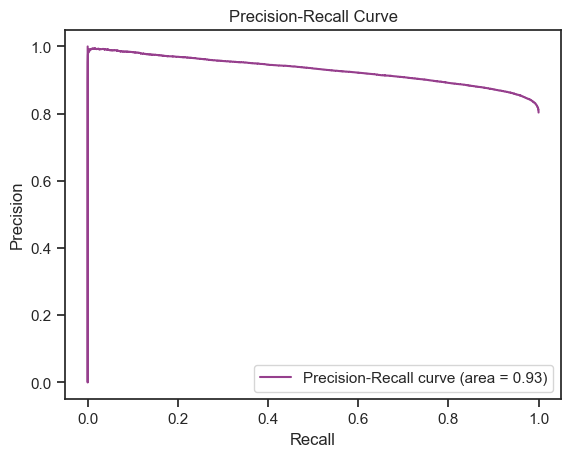

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)

# Calculate AUC
pr_auc = auc(recall, precision)

# Plot the precision-recall curve
plt.figure()
plt.plot(recall, precision, label=f'Precision-Recall curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()


### Actionable Insights 🕵🏽‍♂️
**High Recall, Lower Precision:**

*Insight*: Your model is highly effective at identifying defaulters (high recall) but has a moderate rate of false positives (lower precision).

*Impact*: While the bank minimizes the risk of defaults, it may also be rejecting a significant number of creditworthy applicants, leading to lost business opportunities.


**Geographical Variability:**

*Insight*: Geographical differences can significantly impact loan default rates due to varying economic conditions, cost of living, and access to financial services.

*Impact*: Ignoring geographical factors may lead to suboptimal loan approval decisions and higher default rates in certain regions.

### Recommendations💡
**Segmented Modeling:**

Develop separate models for different geographical regions or clusters with similar characteristics. This allows for more tailored predictions and better handling of regional variations.

**Post-Processing Rules and Manual Review:**

Implement post-processing rules or manual reviews for borderline cases to reduce false positives without significantly impacting recall.

- - - -